<a href="https://colab.research.google.com/github/anishdevadiga/Machine_Learning/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    2
147    0
148    0
149    2
Name: cluster, Length: 150, dtype: int32


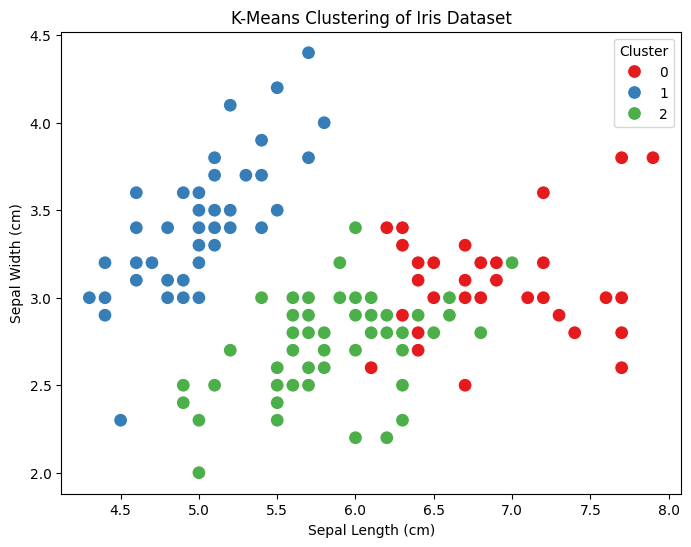

In [11]:

import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load Iris Dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target_class'] = iris.target

# 4. Check the distribution of the target_class column
distribution = iris_df['target_class'].value_counts()

# 5. View percentage distribution of target_class
percentage_distribution = iris_df['target_class'].value_counts(normalize=True) * 100

# 6. View summary of the dataset
summary = iris_df.describe()

# 7. Explore missing values in variables
missing_values = iris_df.isnull().sum()

# Perform KMeans Clustering
kmeans = KMeans(n_clusters=3)
iris_df['cluster'] = kmeans.fit_predict(iris_df[iris.feature_names])
print(iris_df['cluster'])

# Data visualization for K-Means clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=iris_df['sepal length (cm)'], y=iris_df['sepal width (cm)'],
                hue=iris_df['cluster'], palette='Set1', s=100)
plt.title('K-Means Clustering of Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Cluster')
plt.show()

with pd.ExcelWriter('/content/drive/My Drive/knn_iris_distribution.xlsx') as writer:
    distribution.to_excel(writer, sheet_name='Distribution')
